Total failures: 481
Total recoveries: 480
Total time in ON state: 7069.34


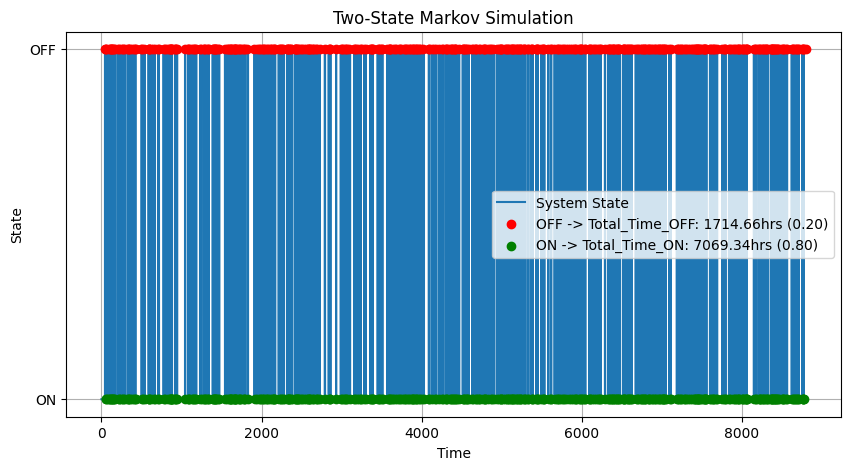

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_time = 8784  # Total simulation time
dt = 1  # Time step
lambda_u = 0.06388  # Failure rate for state 0 to state 1
mu = 0.291  # Repair rate for state 1 to state 0

# Transition matrix
trans_rate_matrix = np.array([
    [0, lambda_u],
    [mu, 0]
])

# Total transition rates
lambda_total = np.sum(trans_rate_matrix, axis=1)

# Initialize counters
ON = 0
FAILED = 1

failure_times = []
recovery_times = []
state_history = [] 
time_history = []

# Simulation loop
time = 0
state = 0  # Initial state ON
failure_time = 0

while time < total_time:

    state_history.append(state)
    time_history.append(time)
    
    # Generate the time to the next transition
    time += -np.log(1 - np.random.rand()) / lambda_total[state]

    # Determine the next state
    cumsum_probs = np.cumsum(trans_rate_matrix[state, :] / lambda_total[state])
    state = np.where(cumsum_probs >= np.random.rand())[0][0]

    # If transitioning to a failure state
    if state == FAILED:
        failure_time = time
        failure_times.append(failure_time)

    # If transitioning to the repair state (index 0)
    else:
        repair_time = time
        recovery_times.append(repair_time)

# Simulation results

failure_times_array = np.array(failure_times)
recovery_times_array = np.array(recovery_times)

final_failure_times_array = []
final_recovery_times_array = []

failure_array_length, recovery_array_length = len(failure_times_array), len(recovery_times_array)

if failure_array_length > recovery_array_length:
    recovery_array_padding_val = failure_times_array[-1]
    final_recovery_times_array = np.pad(recovery_times_array, (0, failure_array_length - recovery_array_length), 'constant', constant_values= recovery_array_padding_val)
    final_failure_times_array = failure_times_array


ON_duration = total_time - sum(np.array(final_recovery_times_array) - np.array(final_failure_times_array))
OFF_duration = total_time - ON_duration

ON_time_fraction = ON_duration/total_time
OFF_time_fraction = OFF_duration/total_time

print(f"Total failures: {len(failure_times)}")
print(f"Total recoveries: {len(recovery_times)}")
print(f"Total time in ON state: {ON_duration:.2f}")

# Plotting results
plt.figure(figsize=(10, 5))
plt.step(time_history, state_history, where='post', label='System State')
plt.scatter(failure_times, [FAILED] * len(failure_times), color='red', label=f'OFF -> Total_Time_OFF: {OFF_duration:.2f}hrs ({OFF_time_fraction:.2f})', zorder=5)
plt.scatter(recovery_times, [ON] * len(recovery_times), color='green', label=f'ON -> Total_Time_ON: {ON_duration:.2f}hrs ({ON_time_fraction:.2f})', zorder=5)
plt.yticks([ON, FAILED], labels=['ON', 'OFF'])
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Two-State Markov Simulation')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
len(recovery_times)

480

In [3]:
len(failure_times)

481